**STACKING**

In [ ]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
import pandas as pd
import re
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [ ]:
import tensorflow
print(tensorflow.__version__)

2.6.0


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot


# Classifiers
from sklearn.svm import NuSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingCVClassifier # <- Here is our boy


# Used to ignore warnings generated from StackingCVClassifier
import warnings
warnings.simplefilter('ignore')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
downloaded = drive.CreateFile({'id':'13x3D_mFjxe1wAVfYp_gBB4-I9SglkH8E'}) # replace the id with id of file you want to access
downloaded.GetContentFile('train.csv') 


In [ ]:
downloaded = drive.CreateFile({'id':'1rOhgv7gt6ZbEbrUIkFSvjBIotIvHF0yz'}) # replace the id with id of file you want to access
downloaded.GetContentFile('test.csv') 


In [ ]:
train = pd.read_csv('train.csv',index_col=False)
print(train.shape)
test=pd.read_csv("test.csv",index_col=False)
print(test.shape)

(307507, 423)
(48744, 422)


In [ ]:
train=train.iloc[:,1:]
test=test.iloc[:,1:]

In [ ]:
for i in train.columns:
    if train[i].isnull().values.any():
          nu=train[i].mean()
          train[i]=train[i].fillna(nu)
          test[i]=test[i].fillna(nu)
for i in test.columns:
    if test[i].isnull().values.any():
          nu=train[i].mean()
          test[i]=test[i].fillna(nu)

In [ ]:
train =train[~train.isin([np.nan, np.inf, -np.inf]).any(1)]
test =test[~test.isin([np.nan, np.inf, -np.inf]).any(1)]
print(test.shape)

(48744, 421)


In [ ]:
X_1, X_test,y_1,y_test= train_test_split(train,train.TARGET, test_size = 0.20, stratify=train.TARGET)
X_train, X_eval,y_train,y_eval= train_test_split(X_1,y_1, test_size = 0.50, stratify=X_1.TARGET)

In [ ]:
t={}
for i in range(3):
  t[str(i)]=X_train.sample(n=X_train.shape[0],replace=True)
columns=X_train.columns
columns=list(columns)
columns.remove("TARGET")

In [ ]:
classifier1 = LogisticRegression()

classifier2 = KNeighborsClassifier()

classifier3 = DecisionTreeClassifier()

classifier4=LogisticRegression()

**METHOD 1**

In [ ]:
classifiers = {"LR": classifier1,
               "KNN": classifier2,
               "DTC": classifier3
               }
for index,key in enumerate(classifiers):
    # Get classifier
    print(key)

    classifier = classifiers[key]

    t_d=pd.DataFrame(t[str(index)])
    
    # Fit classifier
    classifier.fit(t_d[columns],t_d["TARGET"])
        
    # Save fitted classifier
    classifiers[key] = classifier

LR
KNN
DTC


In [ ]:
sclf = StackingCVClassifier(classifiers = [classifier1, classifier2, classifier3],
                            shuffle = False,
                            use_probas = True,
                            cv = 5,
                            meta_classifier = classifier4)

In [ ]:
model=sclf.fit(X_eval[columns].values,X_eval["TARGET"].values)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,classification_report,roc_curve,auc, f1_score
y_pred=model.predict_proba(X_test[columns])
print('Full AUC score %.4f' % roc_auc_score(X_test["TARGET"], y_pred[:,1]))

Full AUC score 0.6319


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,classification_report,roc_curve,auc, f1_score
test["TARGET"]=model.predict_proba(test)[:,1]
test[['SK_ID_CURR', 'TARGET']].to_csv("submission_file_name_stacking_1.csv", index= False)


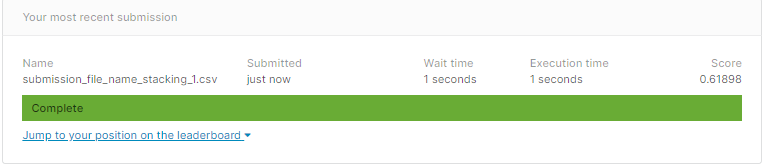

In [ ]:
t={}
for i in range(4):
  t[str(i)]=X_train.sample(n=X_train.shape[0],replace=True)
columns=X_train.columns
columns=list(columns)
columns.remove("TARGET")

**METHOD 2**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier1 = LogisticRegression()

classifier2 = KNeighborsClassifier()

classifier3 = RandomForestClassifier()

classifier4 = GaussianNB()

classifiers = {"LR": classifier1,
               "KNN": classifier2,
               "RF": classifier3,
               "GNB": classifier4
               }
for index,key in enumerate(classifiers):
    # Get classifier
    print(key)

    classifier = classifiers[key]

    t_d=pd.DataFrame(t[str(index)])
    
    # Fit classifier
    classifier.fit(t_d[columns],t_d["TARGET"])
        
    # Save fitted classifier
    classifiers[key] = classifier

LR
KNN
RF
GNB


In [ ]:
sclf = StackingCVClassifier(classifiers = [classifier1, classifier2, classifier3, classifier4],
                            shuffle = False,
                            use_probas = True,
                            cv = 5,
                            meta_classifier = classifier3)

In [ ]:
model=sclf.fit(X_eval[columns].values,X_eval["TARGET"].values)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,classification_report,roc_curve,auc, f1_score
y_pred=model.predict_proba(X_test[columns])
print('Full AUC score %.4f' % roc_auc_score(X_test["TARGET"], y_pred[:,1]))

Full AUC score 0.6595


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,classification_report,roc_curve,auc, f1_score
test["TARGET"]=model.predict_proba(test)[:,1]
test[['SK_ID_CURR', 'TARGET']].to_csv("submission_file_name_stacking_2.csv", index= False)


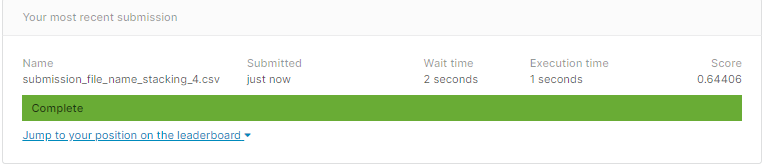

**METHOD 3**

In [ ]:
t={}
for i in range(4):
  t[str(i)]=X_train.sample(n=X_train.shape[0],replace=True)
columns=X_train.columns
columns=list(columns)
columns.remove("TARGET")

In [ ]:
from lightgbm import LGBMClassifier

classifier1 = LogisticRegression()

classifier2 = KNeighborsClassifier()

classifier3 = LGBMClassifier()

classifier4 = GaussianNB()

classifiers = {"LR": classifier1,
               "KNN": classifier2,
               "LGBM": classifier3,
               "GNB": classifier4
               }
for index,key in enumerate(classifiers):
    # Get classifier
    print(key)

    classifier = classifiers[key]

    t_d=pd.DataFrame(t[str(index)])
    
    # Fit classifier
    classifier.fit(t_d[columns],t_d["TARGET"])
        
    # Save fitted classifier
    classifiers[key] = classifier

LR
KNN
LGBM
GNB


In [ ]:
sclf = StackingCVClassifier(classifiers = [classifier1, classifier2, classifier3, classifier4],
                            shuffle = False,
                            use_probas = True,
                            cv = 5,
                            meta_classifier = classifier3)

In [ ]:
model=sclf.fit(X_eval[columns].values,X_eval["TARGET"].values)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,classification_report,roc_curve,auc, f1_score
y_pred=model.predict_proba(X_test[columns])
print('Full AUC score %.4f' % roc_auc_score(X_test["TARGET"], y_pred[:,1]))

Full AUC score 0.7761


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,classification_report,roc_curve,auc, f1_score
test["TARGET"]=model.predict_proba(test)[:,1]
test[['SK_ID_CURR', 'TARGET']].to_csv("submission_file_name_stacking_6.csv", index= False)

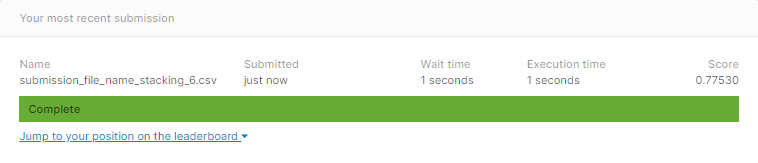